## Module 7 - Network Practice

In this notebook, we will see how to create network visualizations using `networkD3`. 


You may have to **rerun** cells to get the network output for networkD3 examples. 


Here are some references:

- [networkD3 reference](https://cran.r-project.org/web/packages/networkD3/networkD3.pdf)

- [network data sources](http://www-personal.umich.edu/~mejn/netdata/)


## networkD3 Library 

`networkD3` library is an R interface to the **D3 Javascript library**. 


Let's do similar layouts as in the igraph practice notebook for networkD3. **This library produces interactive graphs, you can click on a node and drag it, for example.** 

We need two sets of vertices as input to create a graph from them: source vertices, and target vertices. 

In [12]:
library(networkD3)
library(igraph)

# Create edge data
src <- c("A", "A", "A", "A",
        "B", "B", "C", "C", "D")

target <- c("B", "C", "D", "J",
            "E", "F", "G", "H", "I")

networkData <- data.frame(src, target)

# Plot - may need to run twice 
simpleNetwork(networkData, height=300)

HTML widgets cannot be represented in plain text (need html)

**We can also convert the `igraph` graphs to `D3` graphs.**


In [49]:
# Let's recreate the gSA graph from the igraph practice notebook here: 

adj_matrix <- as.matrix(read.table("/dsa/data/all_datasets/networks/SAcountries.txt",header=FALSE, sep=" "))
SAnames <- read.csv("/dsa/data/all_datasets/networks/SAcountrylist.txt", header=FALSE)
gSA <- graph_from_adjacency_matrix(adj_matrix, weighted = NULL,  mode = "undirected")
gSA <- simplify(gSA)
gSA <- set_vertex_attr(gSA, "label", value= as.vector(SAnames$V1))

head(adj_matrix)
head(SAnames)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13
0,1,1,1,0,0,0,0,1,0,0,1,0
1,0,1,1,0,0,0,0,1,1,0,0,0
1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,0,0,0,0,0,0,0,1,0,0,0
0,0,1,0,0,1,0,0,0,1,0,0,1
0,0,0,0,1,0,0,0,0,1,0,0,0


V1
<fct>
Argentina
Bolivia
Brazil
Chile
Colombia
Ecuador


In [56]:
gSA

IGRAPH 87fb4fe UN-- 13 25 -- 
+ attr: name (v/c), label (v/c)
+ edges from 87fb4fe (vertex names):
 [1] V1--V2  V1--V3  V1--V4  V1--V9  V1--V12 V2--V3  V2--V4  V2--V9  V2--V10
[10] V3--V5  V3--V7  V3--V8  V3--V9  V3--V10 V3--V11 V3--V12 V3--V13 V4--V10
[19] V5--V6  V5--V10 V5--V13 V6--V10 V7--V11 V8--V11 V8--V13

In [31]:
gSA_d3 <- igraph_to_networkD3(gSA)

head(gSA_d3)

source,target
<dbl>,<dbl>
2,9
1,9
3,9
4,9
5,9
2,10
6,10
7,10
0,11


In [11]:
# Create force directed network plot - you can zoom into this graph with mouse 

forceNetwork(Links = gSA_d3$links, Nodes = gSA_d3$nodes, Source = 'source', Target = 'target', 
             NodeID = 'name', Group = 'name', height=500, zoom=TRUE, fontSize=20)

HTML widgets cannot be represented in plain text (need html)

### IS THIS GRAPH PLANAR ? MOVE THE VERTICES WITH MOUSE TO GET RID OF ALL EDGE CROSSINGS IF YOU CAN.


---




Let's look at a more complex data set. This dataset contains the **co-occurance network of characters in Victor Hugo's novel *Les Misérables*.** 


**A vertex represents a character**, and an **edge between two vertices shows that these two characters appeared in the same chapter** of the the book. The **weight** of each edge indicates how often such a co-appearance occured.

In [13]:
# This is the Les Miserables data set that comes with the library 
data(MisLinks)
data(MisNodes)

Edges (links) have **weights** that are represented by the `value` column in the data frame as below: 

In [14]:
head(MisLinks) # EDGE DATA - has weights 

source,target,value
<int>,<int>,<int>
1,0,1
2,0,8
3,0,10
3,2,6
4,0,1
5,0,1


Vertices (nodes) have two attributes: `group` and `size`. 

In [15]:
head(MisNodes) # VERTEX DATA - has size and grouping 

name,group,size
<fct>,<int>,<int>
Myriel,1,15
Napoleon,1,20
Mlle.Baptistine,1,23
Mme.Magloire,1,30
CountessdeLo,1,11
Geborand,1,9


**Can you identify how many different visual channels represent attributes about the data set below?** 

In [16]:
# Plot - Move mouse over VERTICES to see character names 

forceNetwork(Links = MisLinks, Nodes = MisNodes,
            Source = "source", Target = "target",
            Value = "value", NodeID = "name",
            Group = "group", opacity = 0.8, height=600, zoom=TRUE, fontSize=30)

HTML widgets cannot be represented in plain text (need html)

**Look at [here](https://www.rdocumentation.org/packages/networkD3/versions/0.4/topics/forceNetwork) for all the options you can use with `forceNetwork()` function.**

### Here are some links that show alternative visualizations for the same data set: 
 - https://bost.ocks.org/mike/miserables/
 - https://studentwork.prattsi.org/infovis/labs/character-networks-visualization-for-les-miserables/
 - https://studentwork.prattsi.org/infovis/visualization/les-miserables-character-network-visualization/

### YOUR TURN: 

**Create an interactive network** for the South America data from above. You'll need to create two data frames similar to the `Mis` example. 

In [21]:
gSA_d3_links <- gSA_d3$links
#head(gSA_d3_links)
gSA_d3_nodes <- gSA_d3$nodes
#head(gSA_d3_nodes)

forceNetwork(Links = gSA_d3_links, Nodes = gSA_d3_nodes,
             Source = "source", Target = "target",
             NodeID = "name", Group = 'name', opacity = 0.8,
             height=600, zoom = TRUE, fontSize = 30)

HTML widgets cannot be represented in plain text (need html)

Now, **find neighbors of Bolivia** using the `neighbors()` function. For that, you'll need an `igraph` graph. 

+ 5/13 vertices, named, from 87fb4fe:
[1] V1  V3  V4  V9  V10

+ 5/13 vertices, named, from 87fb4fe:
[1] V1  V3  V4  V9  V10

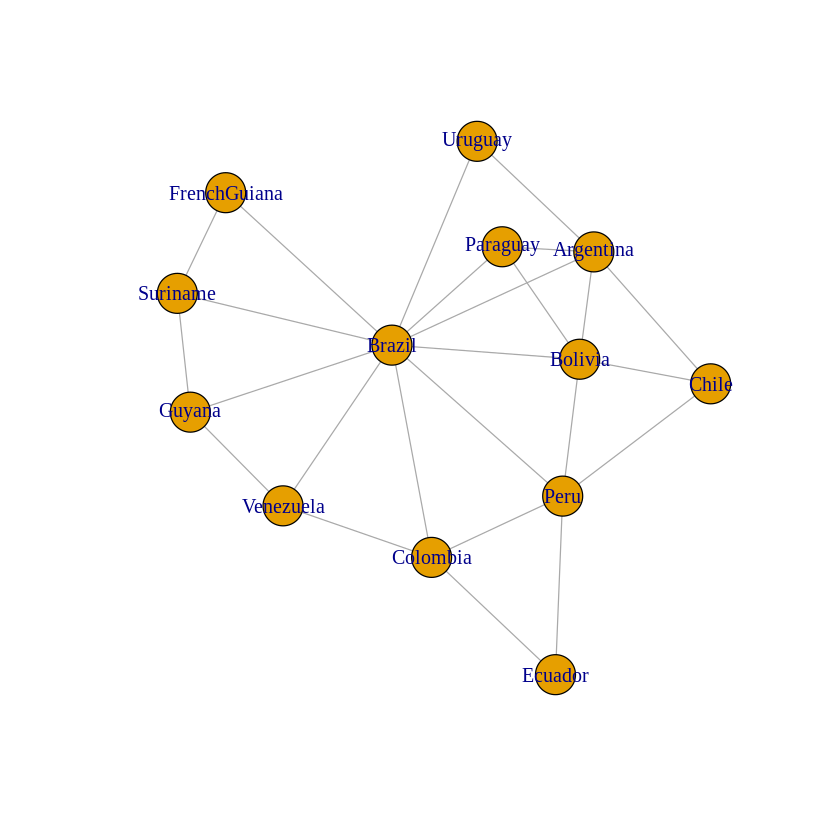

In [60]:
plot(gSA)
neighbors(gSA, V(gSA)[label=="Bolivia"])
neighbors(gSA, V(gSA)[name=="V2"])


---


**We can also read graphs in GML format.** 

This example contains an undirected social network of frequent associations between 62 dolphins in a community living off Doubtful Sound, New Zealand, as compiled by Lusseau et al. (2003). 

In [61]:
gml_data <- read.graph("/dsa/data/all_datasets/networks/dolphins.gml", format=c("gml"))
head(gml_data)

6 x 62 sparse Matrix of class "dgCMatrix"
                                                                              
[1,] . . . . . . . . . . 1 . . . 1 1 . . . . . . . . . . . . . . . . . . . . .
[2,] . . . . . . . . . . . . . . . . . 1 . 1 . . . . . . 1 1 1 . . . . . . . 1
[3,] . . . . . . . . . . 1 . . . . . . . . . . . . . . . . . . . . . . . . . .
[4,] . . . . . . . . 1 . . . . . 1 . . . . . . . . . . . . . . . . . . . . . .
[5,] . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
[6,] . . . . . . . . . 1 . . . 1 . . . . . . . . . . . . . . . . . . . . . . .
                                                      
[1,] . . . 1 . 1 . . . . 1 . . . . . . . . . . . . . .
[2,] . . . . 1 . . . . . . . . . . . . 1 . . . . . . .
[3,] . . . . . 1 . 1 . . . . . . . . . . . . . . . . 1
[4,] . . . . . . . . . . . . . . . . . . . . . . 1 . .
[5,] . . . . . . . . . . . . . . 1 . . . . . . . . . .
[6,] . . . . . . . . . . . . . . . . . . . 1 1 . . . .

In [62]:
gml_data <- simplify(gml_data)

dol <- igraph_to_networkD3(gml_data)

forceNetwork(Links = dol$links, Nodes = dol$nodes, NodeID = "name", Group = "name", height=600, zoom=TRUE)

HTML widgets cannot be represented in plain text (need html)

**With this data set, we can experiment with community detection functions of `igraph` by clustering vertices like this:** 

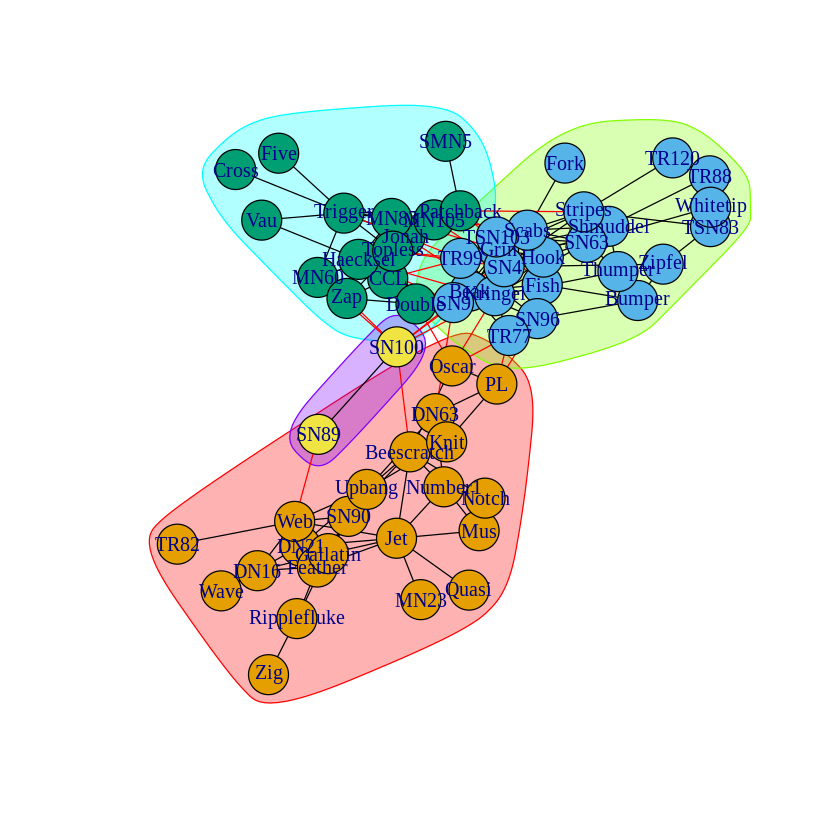

In [63]:
cfg <- cluster_fast_greedy(as.undirected(gml_data))
plot(cfg, gml_data)

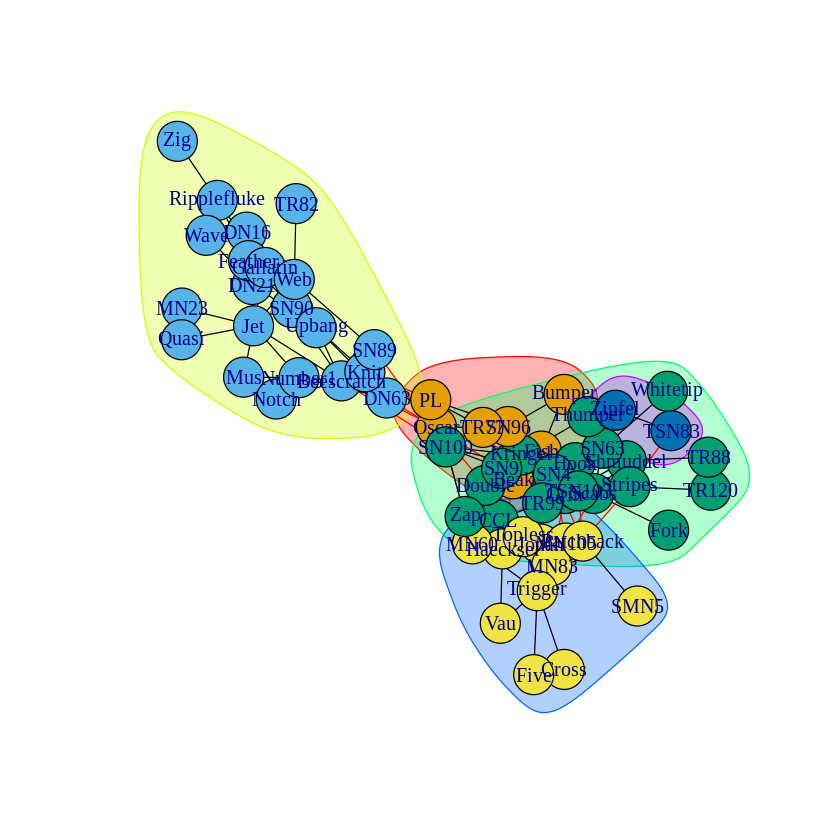

In [64]:
ceb <- cluster_edge_betweenness(gml_data)
plot(ceb, gml_data)

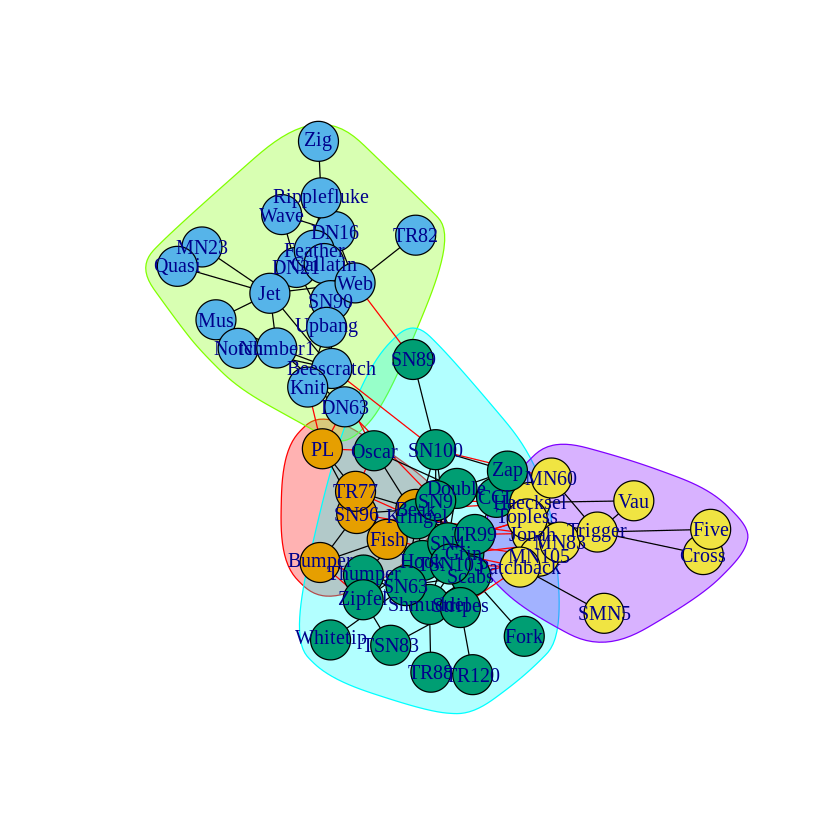

In [65]:
clp <- cluster_label_prop(gml_data)
plot(clp, gml_data)

### Radial Networks

We can also read network data in JSON format like in the example below: 

In [66]:
# example of a radial network given in Javascript's JSON format.
library(jsonlite)
URL <- "https://raw.githubusercontent.com/christophergandrud/networkD3/master/JSONdata/flare.json"

## Convert the data to list format
Flare <- fromJSON(URL, simplifyDataFrame = FALSE)

In [67]:
# JSON format
Flare

$name
[1] "flare"

$children
$children[[1]]
$children[[1]]$name
[1] "analytics"

$children[[1]]$children
$children[[1]]$children[[1]]
$children[[1]]$children[[1]]$name
[1] "cluster"

$children[[1]]$children[[1]]$children
$children[[1]]$children[[1]]$children[[1]]
$children[[1]]$children[[1]]$children[[1]]$name
[1] "AgglomerativeCluster"

$children[[1]]$children[[1]]$children[[1]]$size
[1] 3938


$children[[1]]$children[[1]]$children[[2]]
$children[[1]]$children[[1]]$children[[2]]$name
[1] "CommunityStructure"

$children[[1]]$children[[1]]$children[[2]]$size
[1] 3812


$children[[1]]$children[[1]]$children[[3]]
$children[[1]]$children[[1]]$children[[3]]$name
[1] "HierarchicalCluster"

$children[[1]]$children[[1]]$children[[3]]$size
[1] 6714


$children[[1]]$children[[1]]$children[[4]]
$children[[1]]$children[[1]]$children[[4]]$name
[1] "MergeEdge"

$children[[1]]$children[[1]]$children[[4]]$size
[1] 743




$children[[1]]$children[[2]]
$children[[1]]$children[[2]]$name
[1] "graph"

$children[[1]]$children[[2]]$children
$children[[1]]$children[[2]]$children[[1]]
$children[[1]]$children[[2]]$children[[1]]$name
[1] "BetweennessCentrality"

$children[[1]]$children[[2]]$children[[1]]$size
[1] 3534


$children[[1]]$children[[2]]$children[[2]]
$children[[1]]$children[[2]]$children[[2]]$name
[1] "LinkDistance"

$children[[1]]$children[[2]]$children[[2]]$size
[1] 5731


$children[[1]]$children[[2]]$children[[3]]
$children[[1]]$children[[2]]$children[[3]]$name
[1] "MaxFlowMinCut"

$children[[1]]$children[[2]]$children[[3]]$size
[1] 7840


$children[[1]]$children[[2]]$children[[4]]
$children[[1]]$children[[2]]$children[[4]]$name
[1] "ShortestPaths"

$children[[1]]$children[[2]]$children[[4]]$size
[1] 5914


$children[[1]]$children[[2]]$children[[5]]
$children[[1]]$children[[2]]$children[[5]]$name
[1] "SpanningTree"

$children[[1]]$children[[2]]$children[[5]]$size
[1] 3416




$children[[1]]$children[[3]]
$children[[1]]$children[[3]]$name
[1] "optimization"

$children[[1]]$children[[3]]$children
$children[[1]]$children[[3]]$children[[1]]
$children[[1]]$children[[3]]$children[[1]]$name
[1] "AspectRatioBanker"

$children[[1]]$children[[3]]$children[[1]]$size
[1] 7074






$children[[2]]
$children[[2]]$name
[1] "animate"

$children[[2]]$children
$children[[2]]$children[[1]]
$children[[2]]$children[[1]]$name
[1] "Easing"

$children[[2]]$children[[1]]$size
[1] 17010


$children[[2]]$children[[2]]
$children[[2]]$children[[2]]$name
[1] "FunctionSequence"

$children[[2]]$children[[2]]$size
[1] 5842


$children[[2]]$children[[3]]
$children[[2]]$children[[3]]$name
[1] "interpolate"

$children[[2]]$children[[3]]$children
$children[[2]]$children[[3]]$children[[1]]
$children[[2]]$children[[3]]$children[[1]]$name
[1] "ArrayInterpolator"

$children[[2]]$children[[3]]$children[[1]]$size
[1] 1983


$children[[2]]$children[[3]]$children[[2]]
$children[[2]]$children[[3]]$children[[2]]$name
[1] "ColorInterpolator"

$children[[2]]$children[[3]]$children[[2]]$size
[1] 2047


$children[[2]]$children[[3]]$children[[3]]
$children[[2]]$children[[3]]$children[[3]]$name
[1] "DateInterpolator"

$children[[2]]$children[[3]]$children[[3]]$size
[1] 1375


$children[[2]]$children[[3]]$children[[4]]
$children[[2]]$children[[3]]$children[[4]]$name
[1] "Interpolator"

$children[[2]]$children[[3]]$children[[4]]$size
[1] 8746


$children[[2]]$children[[3]]$children[[5]]
$children[[2]]$children[[3]]$children[[5]]$name
[1] "MatrixInterpolator"

$children[[2]]$children[[3]]$children[[5]]$size
[1] 2202


$children[[2]]$children[[3]]$children[[6]]
$children[[2]]$children[[3]]$children[[6]]$name
[1] "NumberInterpolator"

$children[[2]]$children[[3]]$children[[6]]$size
[1] 1382


$children[[2]]$children[[3]]$children[[7]]
$children[[2]]$children[[3]]$children[[7]]$name
[1] "ObjectInterpolator"

$children[[2]]$children[[3]]$children[[7]]$size
[1] 1629


$children[[2]]$children[[3]]$children[[8]]
$children[[2]]$children[[3]]$children[[8]]$name
[1] "PointInterpolator"

$children[[2]]$c

In [68]:
# Use subset of data for a more readable diagram
Flare$children = Flare$children[1:3]

radialNetwork(List = Flare, fontSize = 20, opacity = 1, height=600)

HTML widgets cannot be represented in plain text (need html)

We can **visualize clusters** with a radial network like this: 

In [69]:
hc <- hclust(dist(USArrests), "ave")
radialNetwork(as.radialNetwork(hc))

HTML widgets cannot be represented in plain text (need html)